In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [37]:
df=pd.read_csv('legal_text_classification1.csv')

In [38]:
df.head()


,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24985 non-null  object
 1   case_outcome  24985 non-null  object
 2   case_title    24985 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 780.9+ KB


In [40]:
df.isnull().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
dtype: int64

In [41]:
df['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

<Axes: xlabel='case_outcome'>

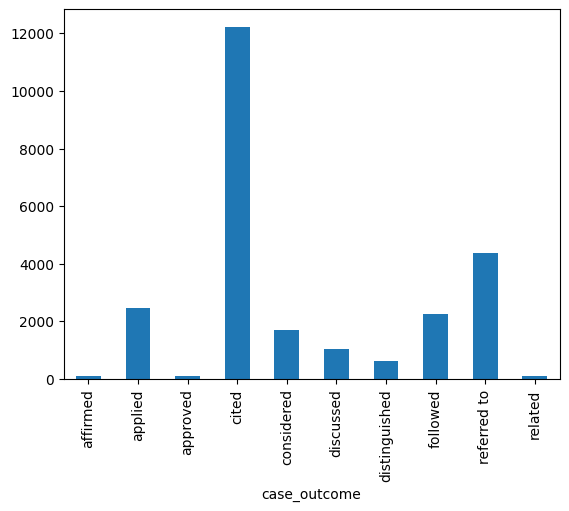

In [42]:
df.groupby('case_outcome')['case_id'].count().plot.bar()

In [43]:
df=df.dropna(how='any')

In [44]:
df

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...


In [45]:
import nltk
nltk.download('punkt')  # Required for word_tokenize
nltk.download('stopwords')  # Required for stopwords


[nltk_data] Downloading package punkt to C:\Users\Shravya H
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shravya H
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import nltk
nltk.download('punkt', download_dir="C:/nltk_data")
nltk.download('stopwords', download_dir="C:/nltk_data")

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import nltk
nltk.data.path.append("C:/nltk_data")


In [48]:
print(nltk.data.path)


['C:\\Users\\Shravya H Jain/nltk_data', 'c:\\Users\\Shravya H Jain\\Desktop\\AI-Judge\\AI-Judge\\.venv\\nltk_data', 'c:\\Users\\Shravya H Jain\\Desktop\\AI-Judge\\AI-Judge\\.venv\\share\\nltk_data', 'c:\\Users\\Shravya H Jain\\Desktop\\AI-Judge\\AI-Judge\\.venv\\lib\\nltk_data', 'C:\\Users\\Shravya H Jain\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'nltk_data', 'C:nltk_data', 'C:/nltk_data', 'C:/nltk_data', 'C:/nltk_data']


In [50]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


# Set NLTK data path
nltk.data.path.append("C:/nltk_data")

# Download punkt tokenizer and stopwords
nltk.download('punkt', download_dir="C:/nltk_data")
nltk.download('stopwords', download_dir="C:/nltk_data")
nltk.download('punkt_tab', download_dir="C:/nltk_data")


# Set stopwords list
list_stopwords = set(stopwords.words('english'))

# Assuming df is already defined
df2 = df[['case_text']].copy()  # Use copy() to avoid SettingWithCopyWarning
df2['case_text'] = df2['case_text'].str.lower()  # Convert text to lowercase

# Ensure that all values in 'case_text' are strings, and handle NaN values
df2['case_text'] = df2['case_text'].fillna('')  # Replace NaN with empty string
df2['case_text'] = df2['case_text'].astype(str)  # Ensure all values are strings

# Tokenize text, remove stopwords, and clean punctuation
df2['case_text'] = df2['case_text'].apply(word_tokenize)  # Tokenize text
df2['case_text'] = df2['case_text'].apply(lambda x: [word for word in x if word not in list_stopwords])  # Remove stopwords
df2['case_text'] = df2['case_text'].apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation)) for word in x])  # Remove punctuation
df2['case_text'] = df2['case_text'].apply(lambda x: [word for word in x if len(word) > 1])  # Remove single-character words


[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
!pip install nltk

In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


# Set NLTK data path
nltk.data.path.append("C:/nltk_data")

# Download punkt tokenizer and stopwords
nltk.download('punkt', download_dir="C:/nltk_data")
nltk.download('stopwords', download_dir="C:/nltk_data")
nltk.download('punkt_tab', download_dir="C:/nltk_data")


# Set stopwords list
list_stopwords = set(stopwords.words('english'))

# Assuming df is already defined
df2 = df[['case_text']].copy()  # Use copy() to avoid SettingWithCopyWarning
df2['case_text'] = df2['case_text'].str.lower()  # Convert text to lowercase

# Ensure that all values in 'case_text' are strings, and handle NaN values
df2['case_text'] = df2['case_text'].fillna('')  # Replace NaN with empty string
df2['case_text'] = df2['case_text'].astype(str)  # Ensure all values are strings

# Tokenize text, remove stopwords, and clean punctuation
df2['case_text'] = df2['case_text'].apply(word_tokenize)  # Tokenize text
df2['case_text'] = df2['case_text'].apply(lambda x: [word for word in x if word not in list_stopwords])  # Remove stopwords
df2['case_text'] = df2['case_text'].apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation)) for word in x])  # Remove punctuation
df2['case_text'] = df2['case_text'].apply(lambda x: [word for word in x if len(word) > 1])  # Remove single-character words


[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [52]:
print(df2.head())


                                           case_text
0  [ordinarily, discretion, exercised, costs, fol...
1  [general, principles, governing, exercise, dis...
2  [ordinarily, discretion, exercised, costs, fol...
3  [general, principles, governing, exercise, dis...
4  [preceding, general, principles, inform, exerc...


In [56]:
df2['case_outcome']=df['case_outcome']

In [57]:
df2

,case_text,case_outcome
0,"[ordinarily, discretion, exercised, costs, fol...",cited
1,"[general, principles, governing, exercise, dis...",cited
2,"[ordinarily, discretion, exercised, costs, fol...",cited
3,"[general, principles, governing, exercise, dis...",cited
4,"[preceding, general, principles, inform, exerc...",cited
...,...,...
24980,"[confined, persons, control, company, extends,...",cited
24981,"[threshold, prescribed, 1335, satisfied, discr...",cited
24982,"[threshold, prescribed, 1335, satisfied, discr...",cited
24983,"[given, extent, deumer, stands, gain, proceedi...",distinguished


In [58]:
df['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

In [59]:
df2_cited=df2[df2['case_outcome']=='cited']
df2_applied=df2[df2['case_outcome']=='applied']
df2_followed=df2[df2['case_outcome']=='followed']
df2_referred=df2[df2['case_outcome']=='referred to']
df2_related=df2[df2['case_outcome']=='related']
df2_considered=df2[df2['case_outcome']=='considered']
df2_discussed=df2[df2['case_outcome']=='discussed']
df2_distinguished=df2[df2['case_outcome']=='distinguished']
df2_affirmed=df2[df2['case_outcome']=='affirmed']
df2_approved=df2[df2['case_outcome']=='approved']

In [61]:
print(df2_cited)

                                               case_text case_outcome
0      [ordinarily, discretion, exercised, costs, fol...        cited
1      [general, principles, governing, exercise, dis...        cited
2      [ordinarily, discretion, exercised, costs, fol...        cited
3      [general, principles, governing, exercise, dis...        cited
4      [preceding, general, principles, inform, exerc...        cited
...                                                  ...          ...
24978  [view, clear, court, may, number, cases, face,...        cited
24979  [threshold, prescribed, 1335, satisfied, discr...        cited
24980  [confined, persons, control, company, extends,...        cited
24981  [threshold, prescribed, 1335, satisfied, discr...        cited
24982  [threshold, prescribed, 1335, satisfied, discr...        cited

[12110 rows x 2 columns]


In [62]:
df3_cited=df2_cited['case_text'].explode()
df3_applied=df2_applied['case_text'].explode()
df3_followed=df2_followed['case_text'].explode()
df3_referred=df2_referred['case_text'].explode()
df3_related=df2_related['case_text'].explode()
df3_considered=df2_considered['case_text'].explode()
df3_discussed=df2_discussed['case_text'].explode()
df3_distinguished=df2_distinguished['case_text'].explode()
df3_affirmed=df2_affirmed['case_text'].explode()
df3_approved=df2_approved['case_text'].explode()

In [63]:
print(df3_cited)

0        ordinarily
0        discretion
0         exercised
0             costs
0            follow
            ...    
24982          city
24982       council
24982          1986
24982          nzlr
24982           746
Name: case_text, Length: 2569029, dtype: object


In [64]:
df3_cited=pd.DataFrame(df3_cited)
df3_applied=pd.DataFrame(df3_applied)
df3_followed=pd.DataFrame(df3_followed)
df3_referred=pd.DataFrame(df3_referred)
df3_related=pd.DataFrame(df3_related)
df3_considered=pd.DataFrame(df3_considered)
df3_discussed=pd.DataFrame(df3_discussed)
df3_distinguished=pd.DataFrame(df3_distinguished)
df3_affirmed=pd.DataFrame(df3_affirmed)
df3_approved=pd.DataFrame(df3_approved)

In [65]:
print(df3_affirmed)

         case_text
184         appeal
184       decision
184        federal
184    magistrates
184          court
...            ...
24287  persecution
24287      defined
24287          91r
24287    migration
24287          act

[19342 rows x 1 columns]


In [68]:
import squarify

In [69]:
df2_total=df2['case_text'].explode()
df2_total=pd.DataFrame(df2_total)

In [70]:
print(df2_total)

        case_text
0      ordinarily
0      discretion
0       exercised
0           costs
0          follow
...           ...
24984         507
24984         515
24984         per
24984    phillips
24984          ja

[5980329 rows x 1 columns]


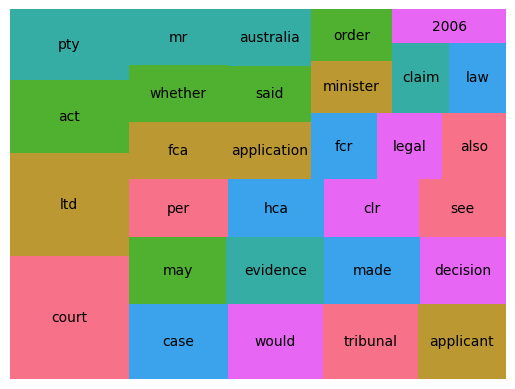

In [71]:
df2_total=pd.DataFrame(df2_total.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df2_total=df2_total.rename(columns={'case_text': 'num'})

x = df2_total['num']
label = df2_total.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

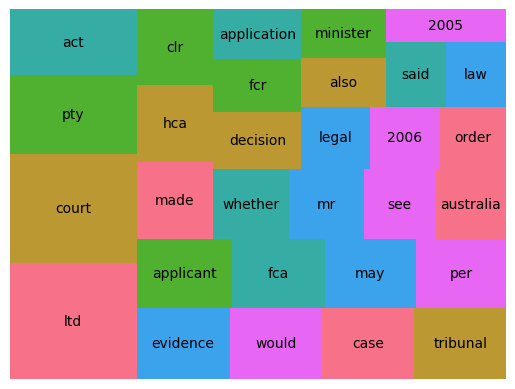

In [72]:
df3_cited=pd.DataFrame(df3_cited.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_cited=df3_cited.rename(columns={'case_text': 'num'})
x = df3_cited['num']
label = df3_cited.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

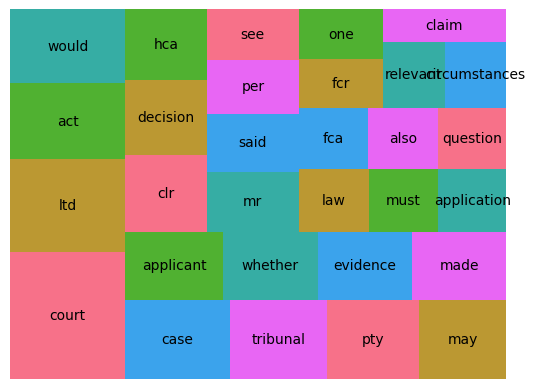

In [73]:
df3_applied=pd.DataFrame(df3_applied.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_applied=df3_applied.rename(columns={'case_text': 'num'})

x = df3_applied['num']
label = df3_applied.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

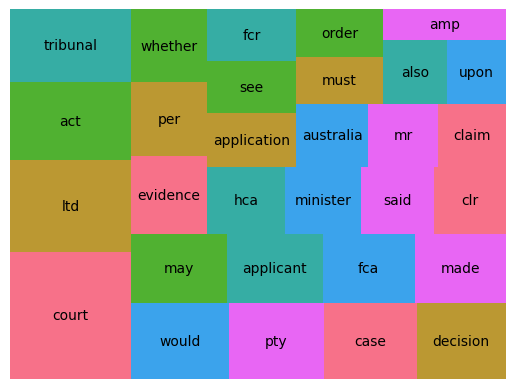

In [74]:
df3_followed=pd.DataFrame(df3_followed.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_followed=df3_followed.rename(columns={'case_text': 'num'})

x = df3_followed['num']
label = df3_followed.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

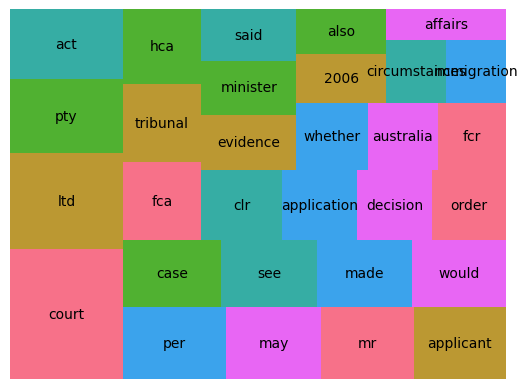

In [75]:
df3_referred=pd.DataFrame(df3_referred.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_referred=df3_referred.rename(columns={'case_text': 'num'})

x = df3_referred['num']
label = df3_referred.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

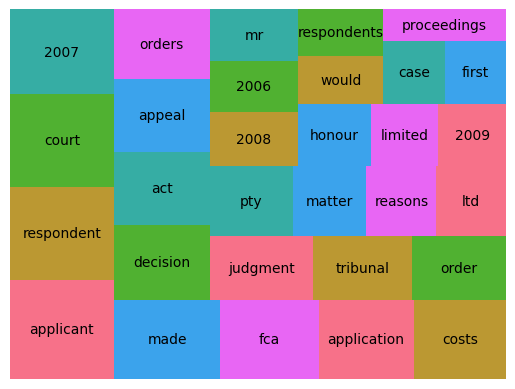

In [76]:
df3_related=pd.DataFrame(df3_related.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_related=df3_related.rename(columns={'case_text': 'num'})

x = df3_related['num']
label = df3_related.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

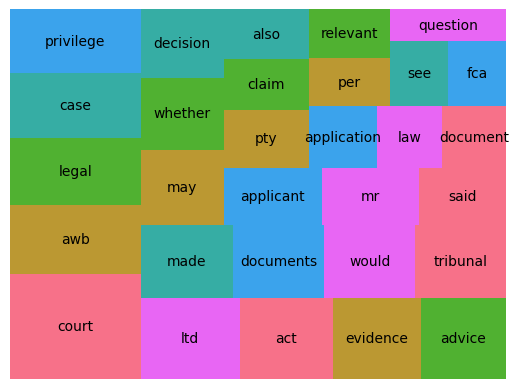

In [77]:
df3_considered=pd.DataFrame(df3_considered.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_considered=df3_considered.rename(columns={'case_text': 'num'})

x = df3_considered['num']
label = df3_considered.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

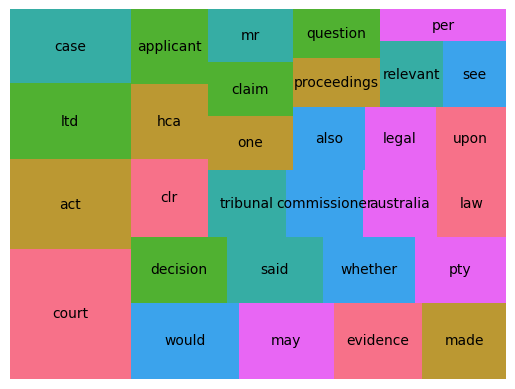

In [78]:
df3_discussed=pd.DataFrame(df3_discussed.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_discussed=df3_discussed.rename(columns={'case_text': 'num'})

x = df3_discussed['num']
label = df3_discussed.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

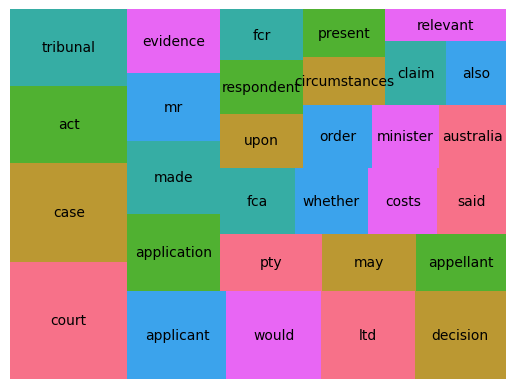

In [79]:
df3_distinguished=pd.DataFrame(df3_distinguished.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_distinguished=df3_distinguished.rename(columns={'case_text': 'num'})

x = df3_distinguished['num']
label = df3_distinguished.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

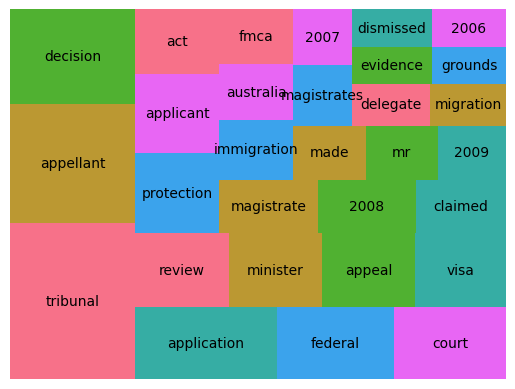

In [80]:
df3_affirmed=pd.DataFrame(df3_affirmed.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_affirmed=df3_affirmed.rename(columns={'case_text': 'num'})

x = df3_affirmed['num']
label = df3_affirmed.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

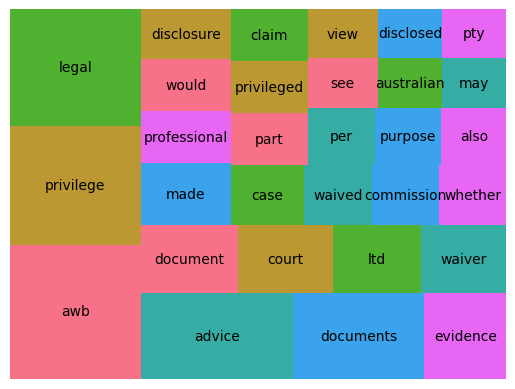

In [81]:
df3_approved=pd.DataFrame(df3_approved.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_approved=df3_approved.rename(columns={'case_text': 'num'})

x = df3_approved['num']
label = df3_approved.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

In [82]:
df['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

In [83]:
df['case_outcome']=df['case_outcome'].replace({'cited':1, 'applied':2,'followed':3,'referred to':4,'related':5,'considered':6,'discussed':7,
              'distinguished':8,'affirmed':9,'approved':10})

In [90]:
!pip install tensorflow


  You can safely remove it manually.
  You can safely remove it manually.


  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.2 MB ? eta -:--:--
   ---------------------------------------- 2.4/390.2 MB 6.4 MB/s eta 0:01:01
    --------------------------------------- 5.2/390.2 MB 9.1 MB/s eta 0:00:43
    --------------------------------------- 8.9/390.2 MB 11.8 MB/s eta 0:00:33
   - -------------------------------------- 11.8/390.2 MB 12.7 MB/s eta 0:00:30
   - -------------------------------------- 12.8/390.2 MB 11.3 MB/s eta 0:00:34
   - -------------------------------------- 16.5/390.2 MB 12.1 MB/s eta 0:00:31
   -- ------------------------------------- 20.4/390.2 MB 13.3 MB/s eta 0:00:28
   -- ------------------------------------- 24.4/390.2 MB 13.8 MB/s eta 0:00:27
   -- ------------------------------------- 26.0/390.2 MB 13.4 MB/s eta 0:00:28
   -- ------------------------------------- 27.5/390.2 MB 12.6 MB/s eta 0:00:29


In [88]:
!pip install keras


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 1.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/3.0 MB 1.9 MB/s eta 0:00:02
   ----------------- ---------------------- 1.3/3.0 MB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 2.1/3.0 MB 2.5 MB/s eta 0:00:01
   ---------------------------------- ----- 2.6/3.0 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 2.7 MB/s eta 0:00:00


In [92]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [101]:
from sklearn.model_selection import train_test_split

sentences = df['case_text'].values
y = df['case_outcome'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)


In [102]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3261746 stored elements and shape (18606, 43281)>

In [103]:
from keras.models import Sequential
from keras import layers

In [104]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [105]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [107]:
model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │       432,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,831 (1.65 MB)

 Trainable params: 432,831 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [109]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4902 - loss: 0.0000e+00
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4978 - loss: 0.0000e+00
Train loss: 0.0
Train accuracy: 0.48898205161094666
Test loss: 0.0
Test accuracy: 0.4855715036392212


In [110]:
# Evaluate the model
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

# Print evaluation results
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

# Save the trained model
model.save('trained_model.h5')  # Save in HDF5 format

print("Model saved as 'trained_model.h5'")


582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4902 - loss: 0.0000e+00
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4978 - loss: 0.0000e+00


Train loss: 0.0
Train accuracy: 0.48898205161094666
Test loss: 0.0
Test accuracy: 0.4855715036392212
Model saved as 'trained_model.h5'
